In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse import coo_matrix,diags
from scipy.sparse.linalg import inv
import gudhi as gd
import copy
import random
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import torch

In [137]:
eps = 0.2
num_pts = 10

# 1. upwards diagonal paths 

[-0.87928191 -0.85747383 -0.60616645 -0.38408425 -0.10161727  0.0333709
  0.24487918  0.50372285  0.56589216  0.99632417]
[-0.14653874  0.16244768  0.16106924  0.11929989  0.11358199 -0.19983217
 -0.03928278  0.11236122  0.05233881  0.1508321 ]
[-0.01223367 -0.1509463   0.07576864 -0.1035441   0.15227668 -0.14120432
 -0.18956693 -0.10125981  0.15864469  0.09621317]
-2
-1


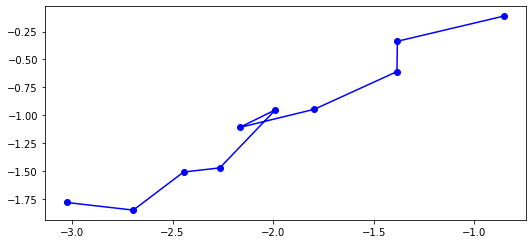

In [213]:

x = np.sort(np.random.uniform(low=-1, high=1, size=num_pts))

print(x)
noise_x= np.random.uniform(low= -eps, high = eps,  size = num_pts)
noise_y= np.random.uniform(low= -eps, high = eps,  size = num_pts)
print(noise_x)
print(noise_y)


x_trans = np.random.randint(-5,5)
y_trans = np.random.randint(-5,5)
print(x_trans)
print(y_trans)
## add random $noise to each pair of coordinates

x_values = list(x+noise_x +x_trans)
y_values = list(np.sin(x+noise_y)+y_trans)

point = np.stack((x_values,y_values))



plt.plot(x_values, y_values, 'bo', linestyle="-")

plt.show()

## 2. Downwards diagonal 

[-0.75859649 -0.51021116 -0.38913385 -0.33641923  0.16836674  0.24870583
  0.53519464  0.90818944  0.93230169  0.93446597]
[-0.18309659  0.03014378  0.05449627 -0.18500371  0.01359541 -0.14081174
  0.04498412  0.08557853  0.16370384 -0.10763512]
[-0.12926254 -0.09914644 -0.12876324  0.04496625 -0.12789135  0.17604342
 -0.13531552 -0.19746598  0.1103844   0.14605417]
-4
-4


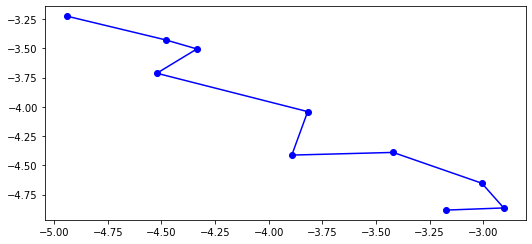

In [140]:

x = np.sort(np.random.uniform(low=-1, high=1, size=num_pts))

print(x)
noise_x= np.random.uniform(low= -eps, high = eps,  size = num_pts)
noise_y= np.random.uniform(low= -eps, high = eps,  size = num_pts)
print(noise_x)
print(noise_y)


x_trans = np.random.randint(-5,5)
y_trans = np.random.randint(-5,5)
print(x_trans)
print(y_trans)
## add random $noise to each pair of coordinates

x_values = list(x+noise_x +x_trans)
y_values = list(-np.sin(x+noise_y)+y_trans)
point = np.stack((x_values,y_values))


plt.plot(x_values, y_values, 'bo', linestyle="-")

plt.show()

### 3. circular paths

[0.47995338 1.1811895  1.65000866 1.7098497  2.05608387 3.84049391
 4.47480622 4.5719916  4.68076557 5.12643455]


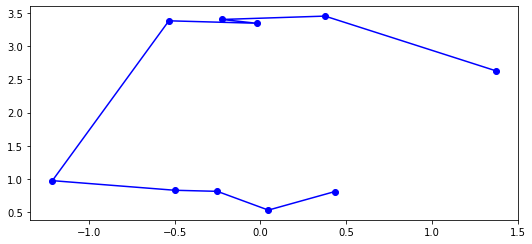

In [208]:
endpoint = np.random.randint(0,num_pts)

sample_angles = list(np.sort(np.random.uniform(0,2*np.pi, num_pts)))
angles= sample_angles[endpoint:]+ sample_angles[:endpoint]


angles = np.array(angles)
noise_x= np.random.uniform(low= -eps, high = eps,  size = num_pts)
noise_y= np.random.uniform(low= -eps, high = eps,  size = num_pts)

print(angles)
x_trans = np.random.randint(-5,5)
y_trans = np.random.randint(-5,5)

r = np.random.uniform(0.5, 2.5)

x_values = r*np.cos(angles)+noise_x+x_trans
y_values = r*np.sin(angles)+noise_y +y_trans

point = np.stack((x_values,y_values))

plt.plot(x_values, y_values, 'bo', linestyle="-")


plt.show()

In [212]:
np.stack((x_values,y_values))

array([[ 1.37167831,  0.37740851, -0.22376176, -0.02210858, -0.53324136,
        -1.21271033, -0.49740778, -0.25106645,  0.04684905,  0.43437188],
       [ 2.63230383,  3.45524019,  3.40462934,  3.34757243,  3.38430899,
         0.97588536,  0.83076657,  0.8148293 ,  0.53207314,  0.81136423]])

In [214]:
def generate_diagonal_paths(num_paths=100,eps = 0.2, num_pts = 10):
    
    Paths = []
    for i in range(num_paths): 
        x = np.sort(np.random.uniform(low=-1, high=1, size=num_pts))
        noise_x= np.random.uniform(low= -eps, high = eps,  size = num_pts)
        noise_y= np.random.uniform(low= -eps, high = eps,  size = num_pts)

        x_trans = np.random.randint(-5,5)
        y_trans = np.random.randint(-5,5)

        x_values = list(x+noise_x +x_trans)
        y_values = list(np.sin(x+noise_y)+y_trans)

        path = np.stack((x_values,y_values))
    
        Paths.append(path)
        
    return Paths


def generate_antidiagonal_paths(num_paths=100,eps = 0.2, num_pts = 10):
    
    Paths = []
    for i in range(num_paths): 
        x = np.sort(np.random.uniform(low=-1, high=1, size=num_pts))

        noise_x= np.random.uniform(low= -eps, high = eps,  size = num_pts)
        noise_y= np.random.uniform(low= -eps, high = eps,  size = num_pts)

        x_trans = np.random.randint(-5,5)
        y_trans = np.random.randint(-5,5)

        x_values = list(x+noise_x +x_trans)
        y_values = list(-np.sin(x+noise_y)+y_trans)
        path = np.stack((x_values,y_values))
    
        Paths.append(path)
        
    return Paths
        



def generate_circular_paths(num_paths=100,eps = 0.2, num_pts = 10):
    
    Paths = []
    for i in range(num_paths): 
        endpoint = np.random.randint(0,num_pts)
        
        sample_angles = list(np.sort(np.random.uniform(0,2*np.pi, num_pts)))
        angles= sample_angles[endpoint:]+ sample_angles[:endpoint]
        angles = np.array(angles)
        
        noise_x= np.random.uniform(low= -eps, high = eps,  size = num_pts)
        noise_y= np.random.uniform(low= -eps, high = eps,  size = num_pts)

        x_trans = np.random.randint(-5,5)
        y_trans = np.random.randint(-5,5)

        r = np.random.uniform(0.5, 2.5)

        x_values = r*np.cos(angles)+noise_x+x_trans
        y_values = r*np.sin(angles)+noise_y +y_trans

        path = np.stack((x_values,y_values))
    
        Paths.append(path)

    return Paths
        








In [215]:
generate_antidiagonal_paths()

[array([[-5.12362621, -4.33716411, -4.49876929, -4.47044089, -4.09853357,
         -3.99826289, -3.77298922, -3.66706211, -3.935571  , -3.68477701],
        [-0.30555955, -0.39071846, -0.60400758, -0.80083585, -0.99825487,
         -1.11021244, -1.07060264, -1.02319021, -1.33893333, -1.48164982]]),
 array([[-4.06213814, -3.66490025, -3.18758989, -3.24773211, -3.09548064,
         -3.16111744, -2.75431296, -2.53583709, -2.27885732, -2.03769729],
        [ 0.82558298,  0.55478818,  0.15169132,  0.24387703, -0.0197261 ,
          0.10776578, -0.22180179, -0.35234044, -0.5505295 , -0.84234065]]),
 array([[-4.84819104, -4.95219131, -4.84709467, -4.4750674 , -4.59174896,
         -4.35997413, -4.25524191, -4.38276234, -3.77399273, -3.94469585],
        [-3.22951361, -3.35527708, -3.39974838, -3.53701442, -3.3247454 ,
         -3.43263537, -3.44269437, -3.50689826, -4.17675676, -4.22520188]]),
 array([[-0.92536723, -0.30364999, -0.23266448, -0.16756608,  0.28843087,
          0.6391584 ,  0.6